In [17]:
import numpy as np
import porepy as pp
import matplotlib.pyplot as plt
import os
import sys
import pickle

main_folder = "./"
spe10_folder = main_folder + "spe10"
sys.path.insert(1, spe10_folder)

from spe10 import Spe10

In [18]:
def Checkpoint3_solution(selected_layer, initial_conc_pos, L=50):
    
    with open(f'coords_outflows/layer_{selected_layer}_coordinates.pickle', 'rb') as f:
        list_coordinates = pickle.load(f)
    with open(f'coords_outflows/layer_{selected_layer}_outflows.pickle', 'rb') as f:
        outflow_data = pickle.load(f)

    x_coords = [coord[0] for coord in list_coordinates]
    y_coords = [coord[1] for coord in list_coordinates]

    distances = [np.sqrt((initial_conc_pos[0] - x)**2 + (initial_conc_pos[1] - y)**2) for x, y in zip(x_coords, y_coords)]
    nearest_distances = np.sort(distances)[:4]
    nearest_indices = np.argsort(distances)[:4]

    total_distance = np.sum(nearest_distances)
    weights = nearest_distances / total_distance
    min_weight, max_weight = min(weights), max(weights)
    sum_max_min = max_weight + min_weight
    inverted_weights = [sum_max_min - w for w in weights]
    sum_inverted_weights = sum(inverted_weights)
    normalized_inverted_weights = [w / sum_inverted_weights for w in inverted_weights]

    for i, weight in enumerate(normalized_inverted_weights):
        print(f"Weight {i}: {weight}")
    print(f"Sum weights {np.sum(normalized_inverted_weights)}")

    weighted_outflow = np.zeros_like(outflow_data[0])
    for i, idx in enumerate(nearest_indices):
        weighted_outflow += outflow_data[idx] * normalized_inverted_weights[i]
   
    return weighted_outflow

Weight 0: 0.37714278928030764
Weight 1: 0.2863842126522857
Weight 2: 0.1925817971582846
Weight 3: 0.14389120090912214
Sum weights 1.0000000000000002


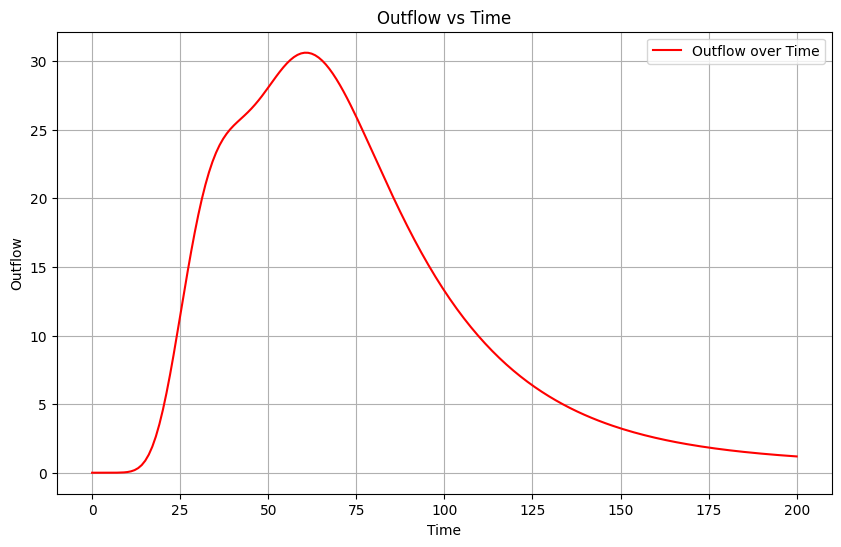

Weight 0: 0.37714278928030764
Weight 1: 0.2863842126522857
Weight 2: 0.1925817971582846
Weight 3: 0.14389120090912214
Sum weights 1.0000000000000002


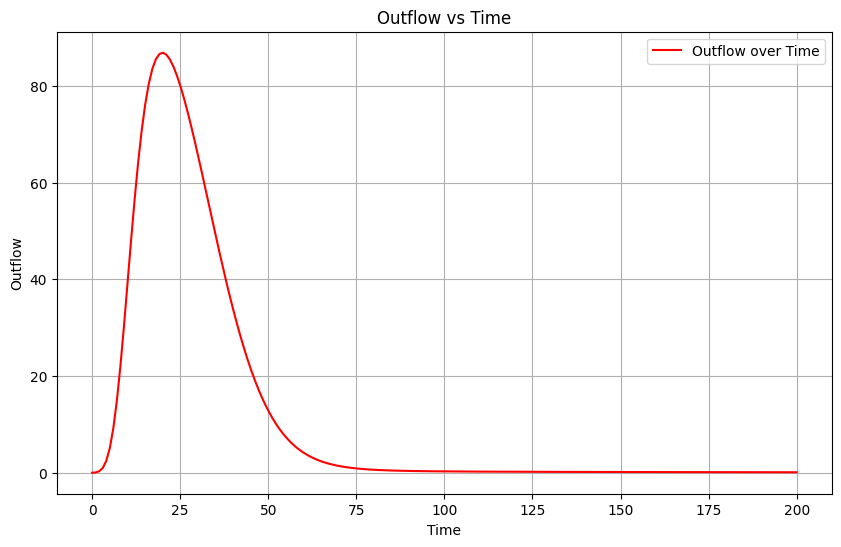

Weight 0: 0.37714278928030764
Weight 1: 0.2863842126522857
Weight 2: 0.1925817971582846
Weight 3: 0.14389120090912214
Sum weights 1.0000000000000002


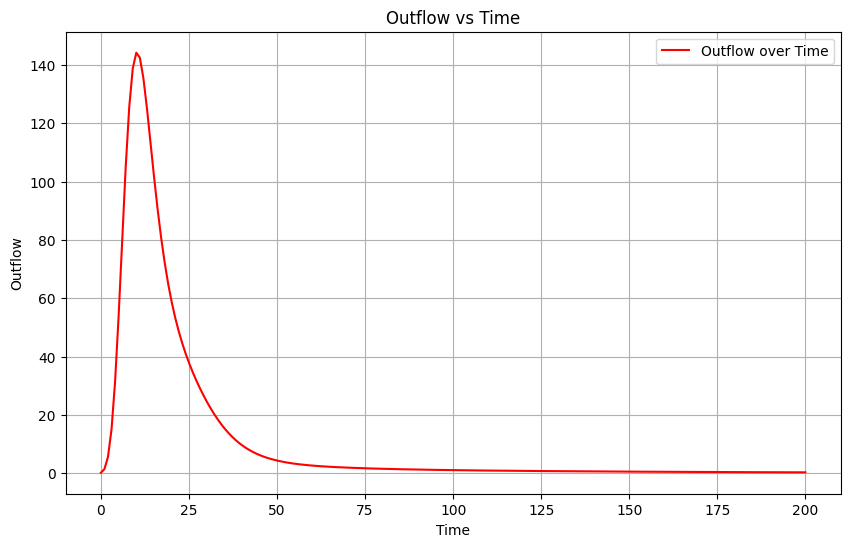

Weight 0: 0.37714278928030764
Weight 1: 0.2863842126522857
Weight 2: 0.1925817971582846
Weight 3: 0.14389120090912214
Sum weights 1.0000000000000002


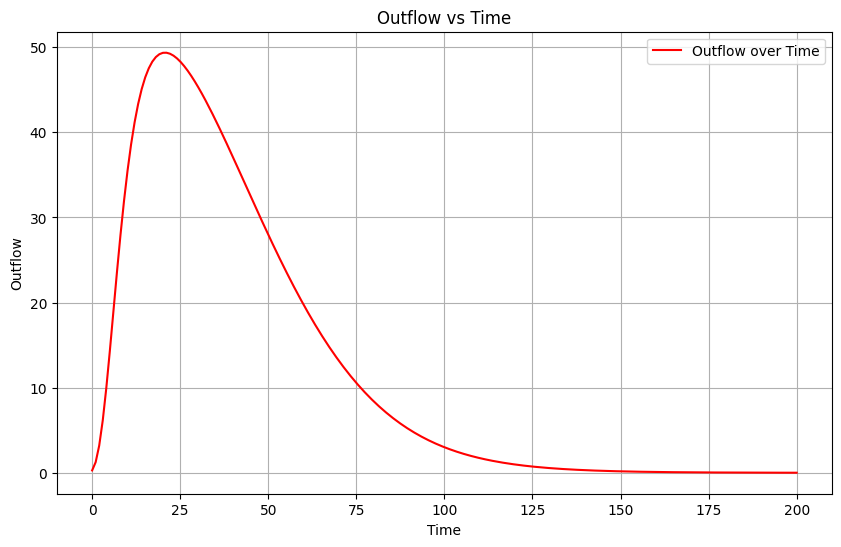

Weight 0: 0.37714278928030764
Weight 1: 0.2863842126522857
Weight 2: 0.1925817971582846
Weight 3: 0.14389120090912214
Sum weights 1.0000000000000002


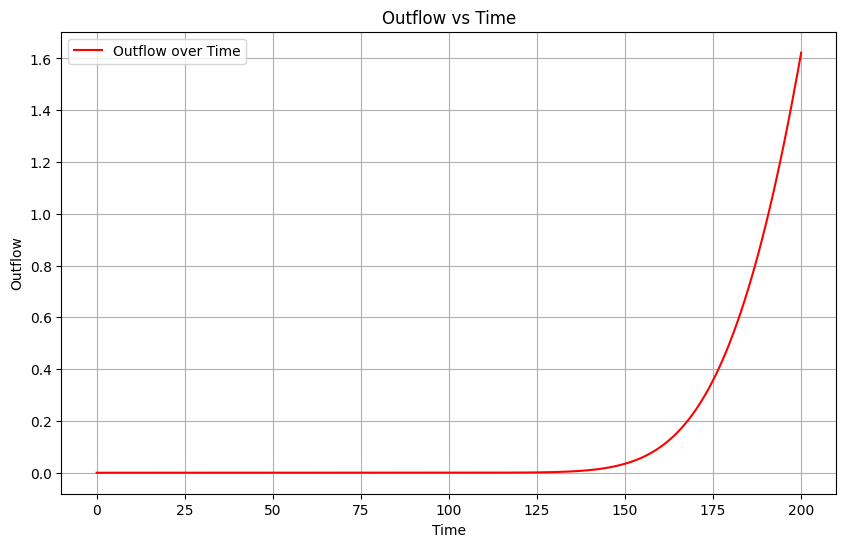

Weight 0: 0.37714278928030764
Weight 1: 0.2863842126522857
Weight 2: 0.1925817971582846
Weight 3: 0.14389120090912214
Sum weights 1.0000000000000002


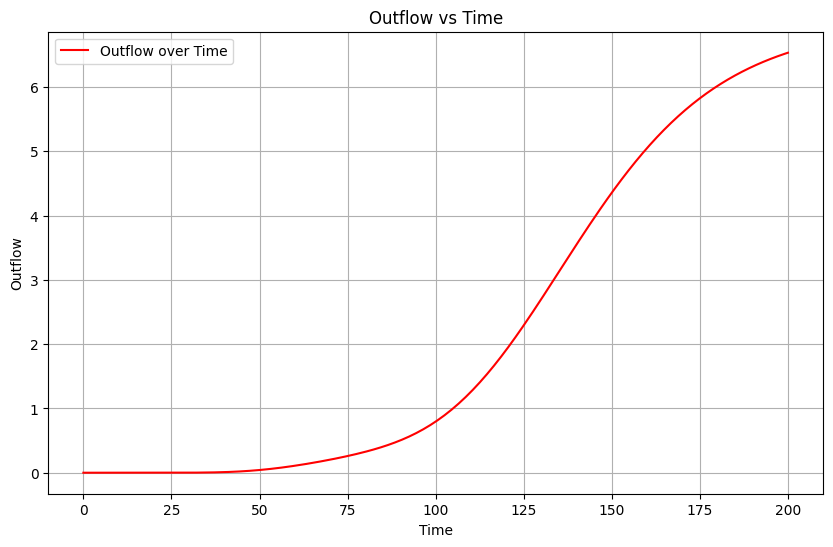

Weight 0: 0.37714278928030764
Weight 1: 0.2863842126522857
Weight 2: 0.1925817971582846
Weight 3: 0.14389120090912214
Sum weights 1.0000000000000002


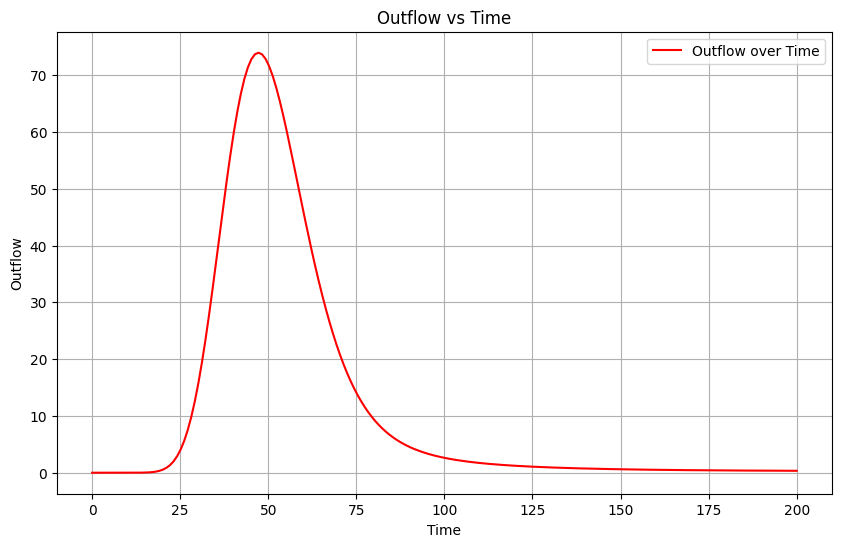

In [19]:
selected_layers = [51, 71, 42, 20, 12, 2, 82]

if __name__ == '__main__':

    for i in range(len(selected_layers)):
    
        outflow = Checkpoint3_solution(selected_layers[i], [120, 250])
        # Simulating time data from 0 to 200
        time = np.linspace(0, 200, 200)  
        # Plotting the data
        plt.figure(figsize=(10, 6))
        plt.plot(time, outflow, label='Outflow over Time', color='red')
        plt.xlabel('Time')
        plt.ylabel('Outflow')
        plt.title('Outflow vs Time')
        plt.grid(True)
        plt.legend()
        plt.show()
        